In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [28]:
from scipy.stats import norm
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
data = pd.read_csv('./data/nfl_data_clean.csv')

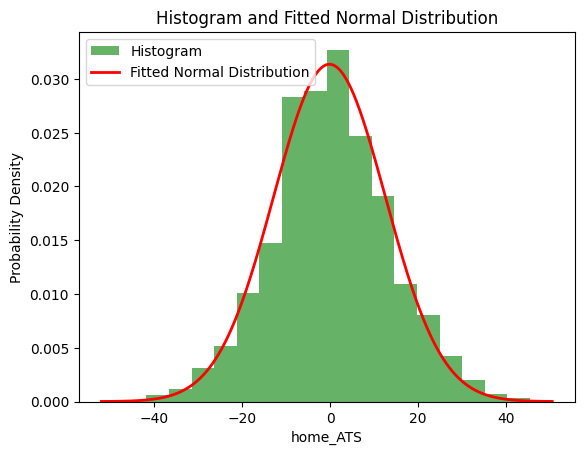

In [4]:
# Extract the 'home_ATS' data
home_ats_data = data['home_ATS']

# Create a histogram of the data
hist, bin_edges = np.histogram(home_ats_data, bins=20, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Define the probability density function for a normal distribution
def normal_distribution(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Fit the normal distribution to the histogram data
params, _ = curve_fit(normal_distribution, bin_centers, hist)
mu, sigma = params

# Create a range of values for the x-axis
x = np.linspace(home_ats_data.min(), home_ats_data.max(), 1000)

# Calculate the corresponding y values using the fitted normal distribution
y = normal_distribution(x, mu, sigma)

# Create the plot
plt.hist(home_ats_data, bins=20, density=True, alpha=0.6, color='g', label='Histogram')
plt.plot(x, y, 'r-', lw=2, label='Fitted Normal Distribution')

# Set labels and title
plt.xlabel('home_ATS')
plt.ylabel('Probability Density')
plt.title('Histogram and Fitted Normal Distribution')

# Add a legend
plt.legend()

# Show the plot
plt.show()

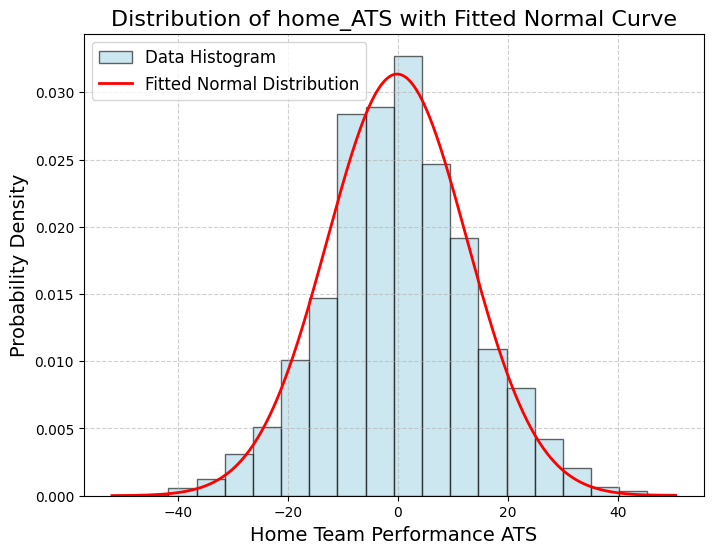

In [5]:
# Extract the 'home_ATS' data
home_ats_data = data['home_ATS']

# Create a histogram of the data
hist, bin_edges = np.histogram(home_ats_data, bins=20, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Define the probability density function for a normal distribution
def normal_distribution(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Fit the normal distribution to the histogram data
params, _ = curve_fit(normal_distribution, bin_centers, hist)
mu, sigma = params

# Create the plot with improved formatting
plt.figure(figsize=(8, 6))  # Set the figure size

# Histogram
plt.hist(home_ats_data, bins=20, density=True, alpha=0.6, color='lightblue', edgecolor='black', label='Data Histogram')

# Fitted Normal Distribution
x = np.linspace(home_ats_data.min(), home_ats_data.max(), 1000)
y = normal_distribution(x, mu, sigma)
plt.plot(x, y, 'r-', lw=2, label='Fitted Normal Distribution')

# Axis labels and title
plt.xlabel('Home Team Performance ATS', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title('Distribution of home_ATS with Fitted Normal Curve', fontsize=16)

# Legend
plt.legend(fontsize=12)

# Grid
plt.grid(True, linestyle='--', alpha=0.6)

# Save the figure as a high-quality image (e.g., PDF) for inclusion in the report
plt.savefig('home_ATS_distribution.pdf', bbox_inches='tight')

# Show the plot (uncomment if you want to see the plot in your Jupyter Notebook)
# plt.show()

In [6]:
mu

-0.14131229533140538

In [7]:
sigma

12.721324926434649

# Time series Train/test split

In [22]:
data = data[data.schedule_season > 2010]

<Axes: title={'center': 'Singular time-based Train/Test split'}>

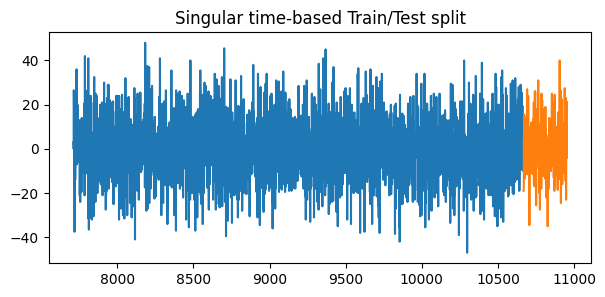

In [25]:
#Visualize standard cross validation
standard_train = data[data.schedule_season != 2022]
standard_test = data[data.schedule_season == 2022]

#visualize data split
fig, ax = plt.subplots(figsize=(7,3))
standard_train.home_ATS.plot(ax=ax, label='Training', title='Singular time-based Train/Test split', markersize=0.01)
standard_test.home_ATS.plot(ax=ax, label='Testing')

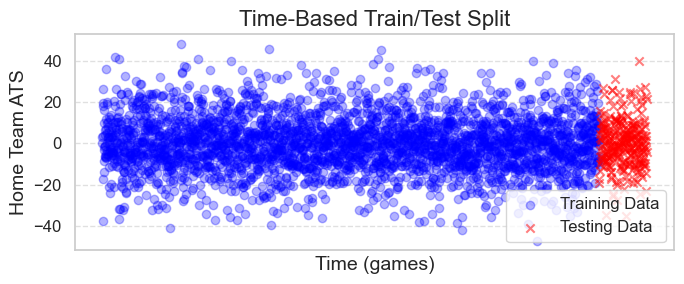

In [38]:
plt.figure(figsize=(7, 3))
sns.set(style="whitegrid")

# Plot the training data in blue
plt.scatter(standard_train['Unnamed: 0'], standard_train['home_ATS'], label='Training Data', color='blue', alpha=0.3, marker='o')

# Plot the testing data in red
plt.scatter(standard_test['Unnamed: 0'], standard_test['home_ATS'], label='Testing Data', color='red', alpha=0.5, marker='x')

# Add labels and title with increased font size
plt.xlabel('Time (games)', fontsize=14)
plt.xticks([])
plt.ylabel('Home Team ATS', fontsize=14)
plt.title('Time-Based Train/Test Split', fontsize=16)

# Add a legend with increased font size
plt.legend(fontsize=12)

# Set the grid style
plt.grid(linestyle='--', alpha=0.6)

# Customize axis tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot and save it as a high-quality image (e.g., PDF) for the report
plt.tight_layout()  # Ensure the plot fits well within the figure

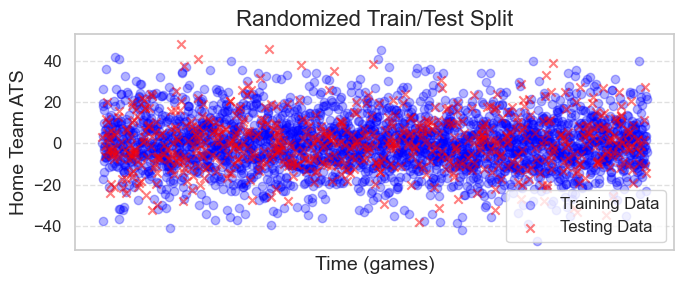

In [37]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Set a common figure size and style for the report
plt.figure(figsize=(7, 3))
sns.set(style="whitegrid")

# Plot the training data in blue
plt.scatter(train_data['Unnamed: 0'], train_data['home_ATS'], label='Training Data', color='blue', alpha=0.3, marker='o')

# Plot the testing data in red
plt.scatter(test_data['Unnamed: 0'], test_data['home_ATS'], label='Testing Data', color='red', alpha=0.5, marker='x')

# Add labels and title with increased font size
plt.xlabel('Time (games)', fontsize=14)
plt.xticks([])
plt.ylabel('Home Team ATS', fontsize=14)
plt.title('Randomized Train/Test Split', fontsize=16)

# Add a legend with increased font size
plt.legend(fontsize=12)

# Set the grid style
plt.grid(linestyle='--', alpha=0.6)

# Customize axis tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot and save it as a high-quality image (e.g., PDF) for the report
plt.tight_layout()  # Ensure the plot fits well within the figure